In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df_train = pd.read_csv('data/train.csv')
df_train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print(type(df_train))
print(df_train.shape)

<class 'pandas.core.frame.DataFrame'>
(42000, 785)


In [5]:
df_test = pd.read_csv('data/test.csv')
df_test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
print(type(df_test))
print(df_test.shape)

<class 'pandas.core.frame.DataFrame'>
(28000, 784)


In [7]:
df_train['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [21]:
y_train=df_train.iloc[:,0].values

In [9]:
print(type(y_train))
print(y_train.shape)

<class 'numpy.ndarray'>
(42000,)


In [10]:
x_train = df_train.iloc[:,1:]

In [11]:
print(type(x_train))
print(x_train.shape)

<class 'pandas.core.frame.DataFrame'>
(42000, 784)


In [12]:
x_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
x_test=df_test.iloc[:,:]

In [14]:
print(type(x_test))
print(x_test.shape)

<class 'pandas.core.frame.DataFrame'>
(28000, 784)


In [15]:
x_train = x_train.values.reshape(-1,28,28)
x_test = x_test.values.reshape(-1,28,28)

In [16]:
print(type(x_train))
print(x_train.shape)
print(type(x_test))
print(x_test.shape)

<class 'numpy.ndarray'>
(42000, 28, 28)
<class 'numpy.ndarray'>
(28000, 28, 28)


In [17]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 188, 255,  94,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 191, 250, 253,  93,   0,   0,   0,
          0,   0],
       [  

In [18]:
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

In [19]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

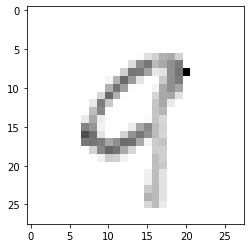

In [22]:
plt.imshow(x_train[41999], cmap=plt.cm.binary)
plt.show()

In [125]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train,y_train,epochs=15)

Train on 42000 samples
Epoch 1/15
42000/42000 [==============================] - 2s 50us/sample - loss: 0.3102 - acc: 0.9099
Epoch 2/15
42000/42000 [==============================] - 2s 54us/sample - loss: 0.1271 - acc: 0.9611
Epoch 3/15
42000/42000 [==============================] - 2s 46us/sample - loss: 0.0850 - acc: 0.9734
Epoch 4/15
42000/42000 [==============================] - 2s 46us/sample - loss: 0.0620 - acc: 0.9803
Epoch 5/15
42000/42000 [==============================] - 2s 46us/sample - loss: 0.0443 - acc: 0.9859
Epoch 6/15
42000/42000 [==============================] - 2s 46us/sample - loss: 0.0340 - acc: 0.9889
Epoch 7/15
42000/42000 [==============================] - 2s 47us/sample - loss: 0.0264 - acc: 0.9915
Epoch 8/15
42000/42000 [==============================] - 2s 46us/sample - loss: 0.0202 - acc: 0.9931
Epoch 9/15
42000/42000 [==============================] - 2s 47us/sample - loss: 0.0195 - acc: 0.9932
Epoch 10/15
42000/42000 [==============================] - 

In [126]:
model.save('basic_mnist.model')

In [127]:
new_model = tf.keras.models.load_model('basic_mnist.model')

In [128]:
predictions = new_model.predict([x_test])

In [129]:
predictions

array([[8.22748889e-19, 5.57740067e-16, 1.00000000e+00, ...,
        3.47459951e-12, 7.36336223e-16, 2.50146859e-22],
       [9.99999762e-01, 2.22797881e-13, 4.00692717e-12, ...,
        1.58734872e-10, 4.55576902e-17, 7.91654828e-13],
       [5.07519022e-18, 7.96439534e-14, 3.96306550e-13, ...,
        1.37383205e-09, 5.51948869e-11, 9.99998808e-01],
       ...,
       [4.32226120e-24, 1.64089989e-19, 9.97854112e-17, ...,
        1.71288803e-16, 7.22290151e-15, 1.14536213e-12],
       [1.22656080e-14, 4.26835975e-13, 1.25858262e-14, ...,
        1.34532012e-08, 1.73314280e-10, 9.99974728e-01],
       [1.01652245e-16, 3.30735398e-14, 1.00000000e+00, ...,
        6.34197642e-12, 3.93654597e-12, 1.95931509e-17]], dtype=float32)

In [130]:
print(np.argmax(predictions[0]))

2


In [131]:
predictions = np.argmax(predictions,axis = 1)

predictions = pd.Series(predictions,name="Label")

In [132]:
predictions

0        2
1        0
2        9
3        9
4        3
        ..
27995    9
27996    7
27997    3
27998    9
27999    2
Name: Label, Length: 28000, dtype: int64

In [133]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),predictions],axis = 1)

submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [136]:
submission.to_csv("v1_basic_mnist3.csv",index=False)